In [2]:
!pip3 install matplotlib scikit-learn

  Using cached matplotlib-3.10.7-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp310-cp310-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


In [1]:
!pip3 install transformers

In [3]:
!pip3 install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [3]:
# set vocab size and keep only this many frequent words
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
# print out training and testing data that was loaded
print('Number of training samples: ', len(y_train))
print('Number of positive samples:', sum(y_train))
print('Number of test samples:', len(y_test))

Number of training samples:  25000
Number of positive samples: 12500
Number of test samples: 25000


In [5]:
# print training sample
# each word represented by an integer
# integer value indicates frequency of the word
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
# use word dictionary to map integer to word
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}
print([index_word.get(i, ' ') for i in X_train[0]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they'

In [7]:
# analyze length of each sample
# all input sequences to RNN must be of same length
review_lengths = [len(x) for x in X_train]

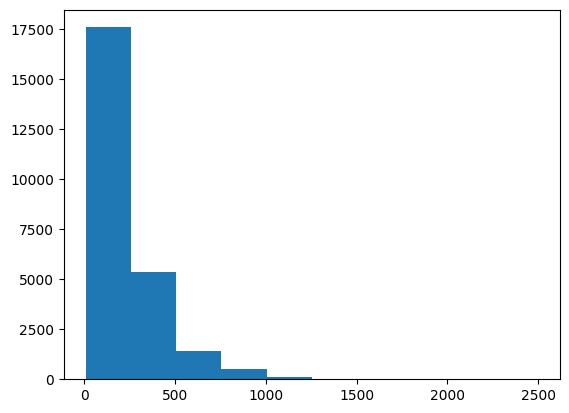

In [8]:
import matplotlib.pyplot as plt
plt.hist(review_lengths, bins=10)
plt.show()


In [9]:
# majority of reviews around 200 words long
# set 200 as universal sequence length
# pad shorter reviews with zeros and cutting longer reviews
# use pad_sequences from keras
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [10]:
# print out input sequences
print('X_train shape after padding:', X_train.shape)
print('X_test shape after padding:', X_test.shape)

X_train shape after padding: (25000, 200)
X_test shape after padding: (25000, 200)


In [12]:
# building LSTM netwrok
tf.random.set_seed(42)
model = models.Sequential()

In [13]:
# input sequences are encoded vectors
# need to be changed to dense vectors using embedding layer from keras
# input sequences made of vocab_size=5000 unique word tokens into
# dense vectors of size 32
embedding_size = 32
model.add(layers.Embedding(vocab_size, embedding_size))


In [14]:
# recurrent LSTM layer
# single layer with 50 nodes
# output layer with sigmoid activation function for binary classification
model.add(layers.LSTM(50))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.build(input_shape=(None, maxlen))

In [17]:
# display model summary to double check layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,651 (690.04 KB)

 Trainable params: 176,651 (690.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:

# compile model 
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [19]:
# train model with batches of 64 size for three epochs
batch_size = 64
n_epoch = 3
model.fit(X_train, y_train, batch_size=batch_size,
          epochs=n_epoch, validation_data=(X_test, y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.7862 - loss: 0.4398 - val_accuracy: 0.8222 - val_loss: 0.3998
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8866 - loss: 0.2804 - val_accuracy: 0.8690 - val_loss: 0.3140
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8974 - loss: 0.2590 - val_accuracy: 0.8640 - val_loss: 0.3242


In [20]:
# evaluate classification accuracy on testing set
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy:', acc)

Test accuracy: 0.8640400171279907


In [21]:
# boost perfromance with multiple LSTM layers
model = models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_size))

In [22]:
# first layer returns sequences to feed output into second layer
# 20% dropout to both LSTM layers to reduce overfitting
# due to more parameters to train
model.add(layers.LSTM(50, return_sequences=True, dropout=0.2))
model.add(layers.LSTM(50, dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# print model summary
model.build(input_shape=(None, maxlen))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 50)        │        16,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,851 (768.95 KB)

 Trainable params: 196,851 (768.95 KB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
# Adam optimizer
optimizer = optimizers.Adam(learning_rate=0.003)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])

In [26]:
# train stacked model for 7 epochs
n_epoch = 7
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch,
          validation_data=(X_test, y_test))

Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.7822 - loss: 0.4718 - val_accuracy: 0.8173 - val_loss: 0.4152
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.8559 - loss: 0.3515 - val_accuracy: 0.7927 - val_loss: 0.4703
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.8822 - loss: 0.2969 - val_accuracy: 0.8594 - val_loss: 0.3239
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9045 - loss: 0.2433 - val_accuracy: 0.8722 - val_loss: 0.3144
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.9143 - loss: 0.2178 - val_accuracy: 0.8738 - val_loss: 0.3122
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.9252 - loss: 0.1956 - val_accuracy: 0.8618 - val_loss: 0.3562
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.9362 - loss: 0.1703 - val_accuracy: 0.8728 - val_loss: 0.3611


In [27]:
# verify test accuracy
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print('Test accuracy with stacked LSTM:', acc)

Test accuracy with stacked LSTM: 0.872759997844696


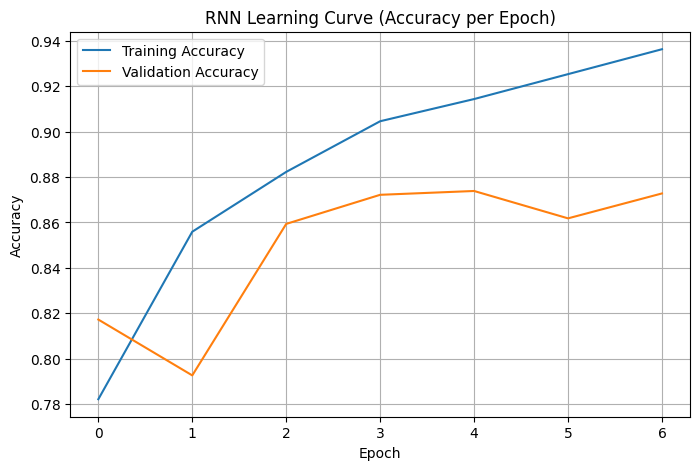

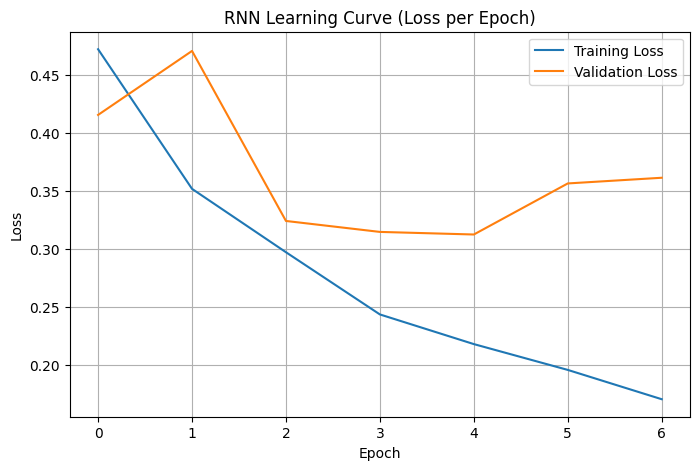

In [28]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Learning Curve (Accuracy per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Learning Curve (Loss per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

############### build traditional ML models for comparison: SVM and NB ############################ 

In [29]:
# build SVM
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [30]:
# reload IMDb dataset
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [31]:
# convert integer sequences back to text
word_index = imdb.get_word_index()
index_word = {v + 3: k for k, v in word_index.items()}
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

def decode_review(encoded_review):
    return " ".join([index_word.get(i, "?") for i in encoded_review])

X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]

In [32]:
# convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [33]:
# train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [34]:
# predict and evaluate on test set
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Test Accuracy:", accuracy)

SVM Test Accuracy: 0.87492


### Naive Bayes model with TF-IDF

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# train NB classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# evaluate on test set
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Test Accuracy: {nb_accuracy:.4f}")

Naive Bayes Test Accuracy: 0.8428


In [38]:
# visualize learning curves
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

def plot_learning_curve(estimator, title, X, y, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5),
                        ylim=None, axes=None):
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes, return_times=True
    )

    # calculate means & stds
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    test_mean  = np.mean(test_scores, axis=1)
    test_std   = np.std(test_scores, axis=1)
    fit_mean   = np.mean(fit_times, axis=1)
    fit_std    = np.std(fit_times, axis=1)

    # plot 1: Learning Curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    axes[0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    axes[0].plot(train_sizes, train_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # plot 2: Scalability
    axes[1].grid()
    axes[1].plot(train_sizes, fit_mean, "o-")
    axes[1].fill_between(train_sizes, fit_mean - fit_std, fit_mean + fit_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Fit time (s)")
    axes[1].set_title("Scalability")

    # performance vs Fit Time 
    sort_idx = np.argsort(fit_mean)
    axes[2].grid()
    axes[2].plot(fit_mean[sort_idx], test_mean[sort_idx], "o-")
    axes[2].fill_between(fit_mean[sort_idx],
                         test_mean[sort_idx] - test_std[sort_idx],
                         test_mean[sort_idx] + test_std[sort_idx],
                         alpha=0.1)
    axes[2].set_xlabel("Fit time (s)")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance vs Fit Time")

    return fig, axes


Plotting Learning Curve: Naive Bayes
Plotting Learning Curve: SVM


(<Figure size 2000x500 with 3 Axes>,
 array([<Axes: title={'center': 'Learning Curves, Scalability, and Performance - Support Vector Machine'}, xlabel='Training examples', ylabel='Score'>,
        <Axes: title={'center': 'Scalability'}, xlabel='Training examples', ylabel='Fit time (s)'>,
        <Axes: title={'center': 'Performance vs Fit Time'}, xlabel='Fit time (s)', ylabel='Score'>],
       dtype=object))

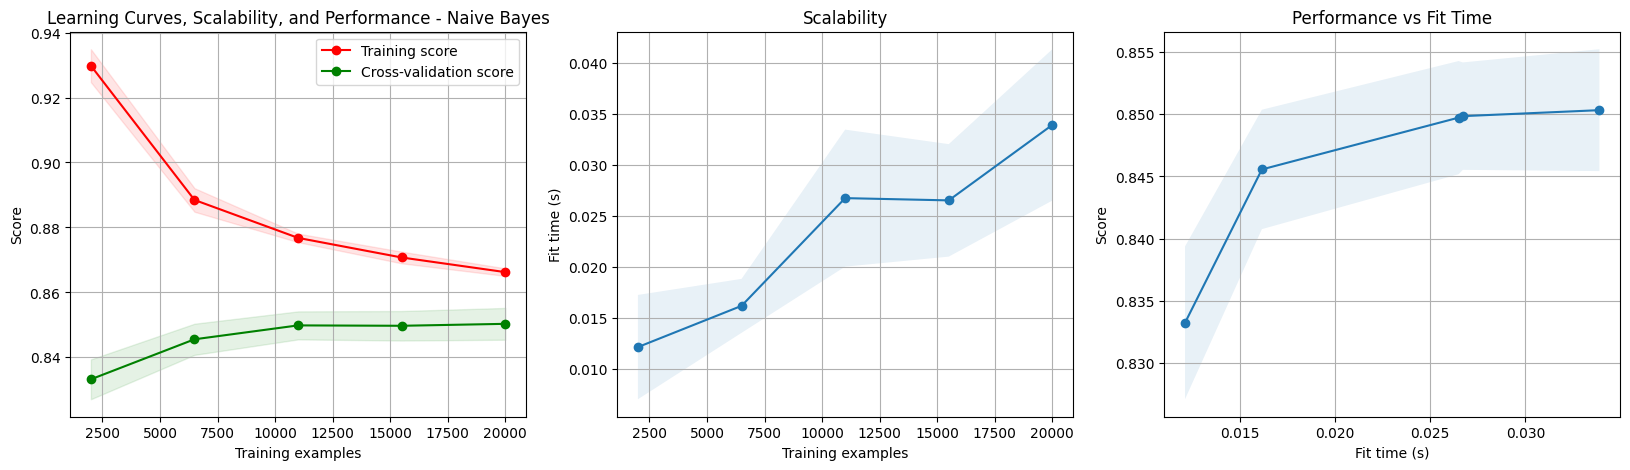

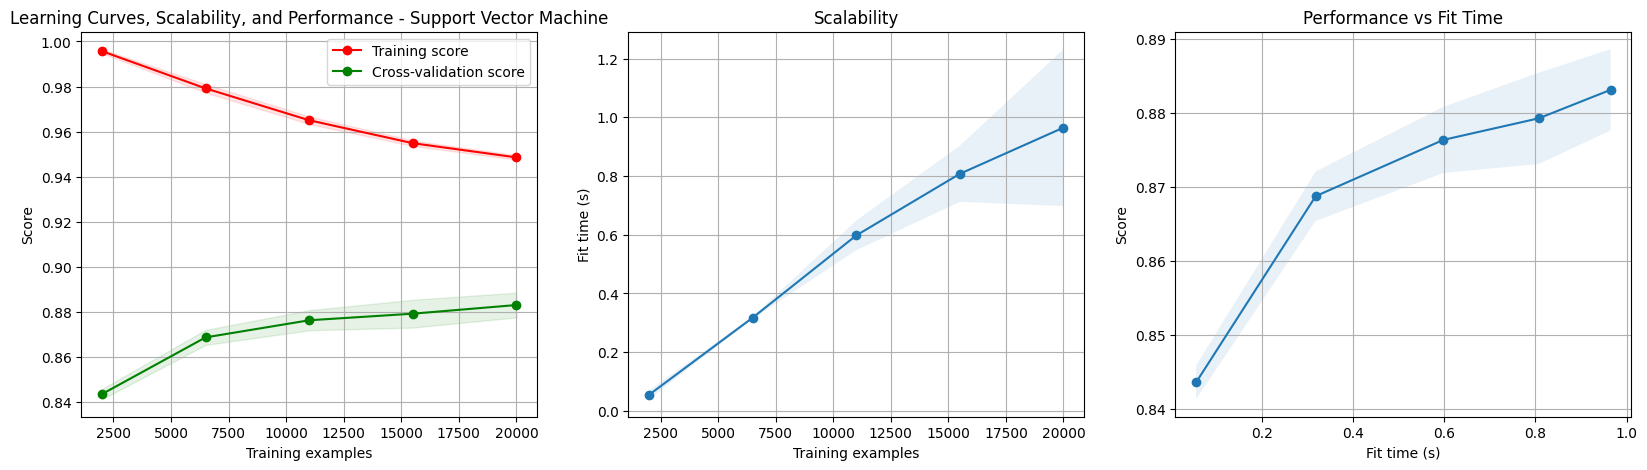

In [39]:
# cross-validation setup
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Naive Bayes Learning Curve
print("Plotting Learning Curve: Naive Bayes")
plot_learning_curve(
    estimator=MultinomialNB(),
    title="Learning Curves, Scalability, and Performance - Naive Bayes",
    X=X_train_tfidf,       # TF-IDF features from IMDb
    y=y_train,
    cv=cv,
    n_jobs=-1
)

# Support Vector Machine Learning Curve
print("Plotting Learning Curve: SVM")
plot_learning_curve(
    estimator=LinearSVC(),
    title="Learning Curves, Scalability, and Performance - Support Vector Machine",
    X=X_train_tfidf,
    y=y_train,
    cv=cv,
    n_jobs=-1
)

